## Here is to predict and prepare a model to classfier individual to chech there loan credit history

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## We read in the dataset

In [2]:
credit = pd.read_csv('credit-g.csv')

## Next we do some checking and if need for cleaning and some analysis

In [3]:
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
credit.transpose()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
checking_status,'<0','0<=X<200','no checking','<0','<0','no checking','no checking','0<=X<200','no checking','0<=X<200',...,'no checking','no checking','<0','<0','no checking','no checking','<0','no checking','<0','0<=X<200'
duration,6,48,12,42,24,36,24,36,12,30,...,12,15,18,36,12,12,30,12,45,45
credit_history,'critical/other existing credit','existing paid','critical/other existing credit','existing paid','delayed previously','existing paid','existing paid','existing paid','existing paid','critical/other existing credit',...,'critical/other existing credit','all paid','existing paid','existing paid','existing paid','existing paid','existing paid','existing paid','existing paid','critical/other existing credit'
purpose,radio/tv,radio/tv,education,furniture/equipment,'new car',education,furniture/equipment,'used car',radio/tv,'new car',...,education,radio/tv,radio/tv,furniture/equipment,'new car',furniture/equipment,'used car',radio/tv,radio/tv,'used car'
credit_amount,1169,5951,2096,7882,4870,9055,2835,6948,3059,5234,...,3565,1569,1936,3959,2390,1736,3857,804,1845,4576
savings_status,'no known savings','<100','<100','<100','<100','no known savings','500<=X<1000','<100','>=1000','<100',...,'no known savings','100<=X<500','no known savings','<100','no known savings','<100','<100','<100','<100','100<=X<500'
employment,'>=7','1<=X<4','4<=X<7','4<=X<7','1<=X<4','1<=X<4','>=7','1<=X<4','4<=X<7',unemployed,...,'<1','>=7','4<=X<7',unemployed,'>=7','4<=X<7','1<=X<4','>=7','1<=X<4',unemployed
installment_commitment,4,2,2,2,3,2,3,2,2,4,...,2,4,2,4,4,3,4,4,4,3
personal_status,'male single','female div/dep/mar','male single','male single','male single','male single','male single','male single','male div/sep','male mar/wid',...,'male single','male single','male mar/wid','male single','male single','female div/dep/mar','male div/sep','male single','male single','male single'
other_parties,none,none,none,guarantor,none,none,none,none,none,none,...,none,none,none,none,none,none,none,none,none,none


In [5]:
total = credit.isnull().sum().sort_values(ascending=False)
percent = (credit.isnull().sum()/credit.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
class,0,0.0
other_parties,0,0.0
duration,0,0.0
credit_history,0,0.0
purpose,0,0.0
credit_amount,0,0.0
savings_status,0,0.0
employment,0,0.0
installment_commitment,0,0.0
personal_status,0,0.0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='checking_status', ylabel='count'>

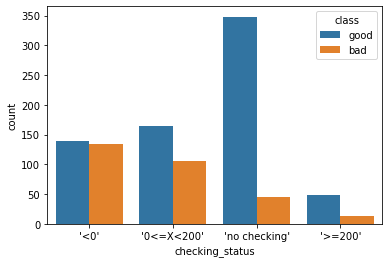

In [8]:
sns.countplot('checking_status',hue = 'class', data = credit)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration', ylabel='count'>

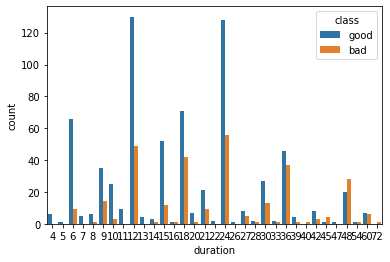

In [9]:
sns.countplot('duration',hue = 'class', data = credit)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='other_parties', ylabel='count'>

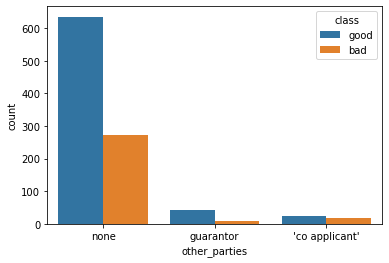

In [10]:
sns.countplot('other_parties',hue = 'class', data = credit)

In [11]:
credit.replace(to_replace=['no checking','<0','0<=X<200','>=200'],value=[1,2,3,4],inplace = True)

In [70]:
credit['purpose'].value_counts()

1     280
2     234
3     181
4     103
5      97
6      50
7      22
9      12
8      12
10      9
Name: purpose, dtype: int64

In [71]:
credit.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [72]:
cmap = {"'no checking'": 1, "'<0'": 2,"'0<=X<200'":3,"'>=200'":4,"'existing paid'":1,"'critical/other existing credit'":2,
       "'delayed previously'":3,"'all paid'":4,"'no credits/all paid'":5,'radio/tv':1,"'new car'":2,'furniture/equipment':3,
      "'used car'":4,'business':5,'education':6,'repairs':7,"'domestic appliance'":8,'other':9,'retraining':10,
       "'<100'":1,"'no known savings'":2,"'100<=X<500'":3,"'500<=X<1000'":4,"'>=1000'":5,"'1<=X<4'":1,"'>=7'":2,"'4<=X<7'":3,"'<1'":4,
       'unemployed':5,"'male single'":1,"'female div/dep/mar'":2,"'male mar/wid'":3,"'male div/sep'":4,'none':1,'guarantor':2,"'co applicant'":3,
       'car':1,"'real estate'":2,"'life insurance'":3,"'no known property'":4,'bank':2,'stores':3,'own':1,'rent':2,"'for free'":3,
       'skilled':1,"'unskilled resident'":2,"'high qualif/self emp/mgmt'":3,"'unemp/unskilled non res'":4,'yes':2,'no':1 }
credit = credit.applymap(lambda s: cmap.get(s) if s in cmap else s)

In [73]:
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,2,1,1169,2,2,4,1,1,...,2,67,1,1,2,1,1,2,2,good
1,3,48,1,1,5951,1,1,2,2,1,...,2,22,1,1,1,1,1,1,2,bad
2,1,12,2,6,2096,1,3,2,1,1,...,2,49,1,1,1,2,2,1,2,good
3,2,42,1,3,7882,1,3,2,1,2,...,3,45,1,3,1,1,2,1,2,good
4,2,24,3,2,4870,1,1,3,1,1,...,4,53,1,3,2,1,2,1,2,bad


<AxesSubplot:>

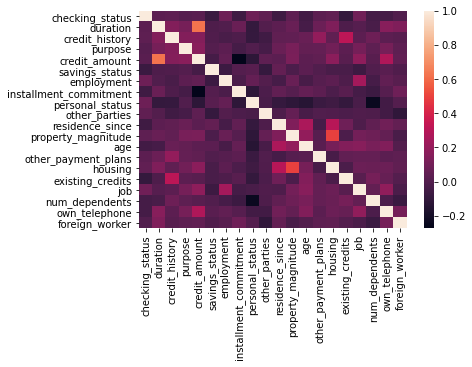

In [74]:
sns.heatmap(credit.corr())

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [76]:
X=credit.drop('class',axis =1)
y = credit['class']

In [77]:
#Using Logistic Regression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
Lr = LogisticRegression()
Lr.fit(X_train,y_train)

LogisticRegression()

In [78]:
Lr.score(X_test,y_test)

0.728

In [79]:
pred = Lr.predict(X_test)

In [80]:
pred

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'goo

In [81]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 26  48]
 [ 20 156]]
              precision    recall  f1-score   support

         bad       0.57      0.35      0.43        74
        good       0.76      0.89      0.82       176

    accuracy                           0.73       250
   macro avg       0.66      0.62      0.63       250
weighted avg       0.71      0.73      0.71       250



In [84]:
#Using Decision Tree
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
Dc =DecisionTreeClassifier()
Dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
Dc.score(X_test,y_test)

0.692

In [86]:
pred2 = Dc.predict(X_test)

In [87]:
pred2

array(['bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good

In [88]:
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

[[ 32  42]
 [ 35 141]]
              precision    recall  f1-score   support

         bad       0.48      0.43      0.45        74
        good       0.77      0.80      0.79       176

    accuracy                           0.69       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.68      0.69      0.69       250



In [89]:
#Using Randomforest Tree
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
Rf.score(X_test,y_test)

0.768

In [91]:
pred3 = Rf.predict(X_test)

In [92]:
pred3

array(['bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'go

In [93]:
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

[[ 31  43]
 [ 15 161]]
              precision    recall  f1-score   support

         bad       0.67      0.42      0.52        74
        good       0.79      0.91      0.85       176

    accuracy                           0.77       250
   macro avg       0.73      0.67      0.68       250
weighted avg       0.76      0.77      0.75       250



In [95]:
#Using Logistic Regression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [96]:
knn.score(X_test,y_test)

0.708

In [98]:
pred4 = knn.predict(X_test)

In [99]:
pred4

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'goo

In [100]:
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

[[ 24  50]
 [ 23 153]]
              precision    recall  f1-score   support

         bad       0.51      0.32      0.40        74
        good       0.75      0.87      0.81       176

    accuracy                           0.71       250
   macro avg       0.63      0.60      0.60       250
weighted avg       0.68      0.71      0.69       250



In [101]:
#Using 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
clf = SVC(kernel = 'rbf' )
clf.fit(X_train,y_train)


SVC()

In [102]:
clf.score(X_test,y_test)

0.716

In [103]:
pred5 = clf.predict(X_test)

In [104]:
pred5

array(['bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'good

In [105]:
print(confusion_matrix(y_test,pred5))
print(classification_report(y_test,pred5))

[[ 18  56]
 [ 15 161]]
              precision    recall  f1-score   support

         bad       0.55      0.24      0.34        74
        good       0.74      0.91      0.82       176

    accuracy                           0.72       250
   macro avg       0.64      0.58      0.58       250
weighted avg       0.68      0.72      0.68       250



In [106]:
#Using NaiveBayes
from sklearn.naive_bayes import GaussianNB
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
Nb = GaussianNB()
Nb.fit(X_train,y_train)

GaussianNB()

In [107]:
Nb.score(X_test,y_test)

0.724

In [108]:
pred6 = clf.predict(X_test)

In [109]:
pred6

array(['bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'good

In [110]:
print(confusion_matrix(y_test,pred6))
print(classification_report(y_test,pred6))

[[ 18  56]
 [ 15 161]]
              precision    recall  f1-score   support

         bad       0.55      0.24      0.34        74
        good       0.74      0.91      0.82       176

    accuracy                           0.72       250
   macro avg       0.64      0.58      0.58       250
weighted avg       0.68      0.72      0.68       250

